In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.rename({"Genre":"Gender"},axis=1,inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


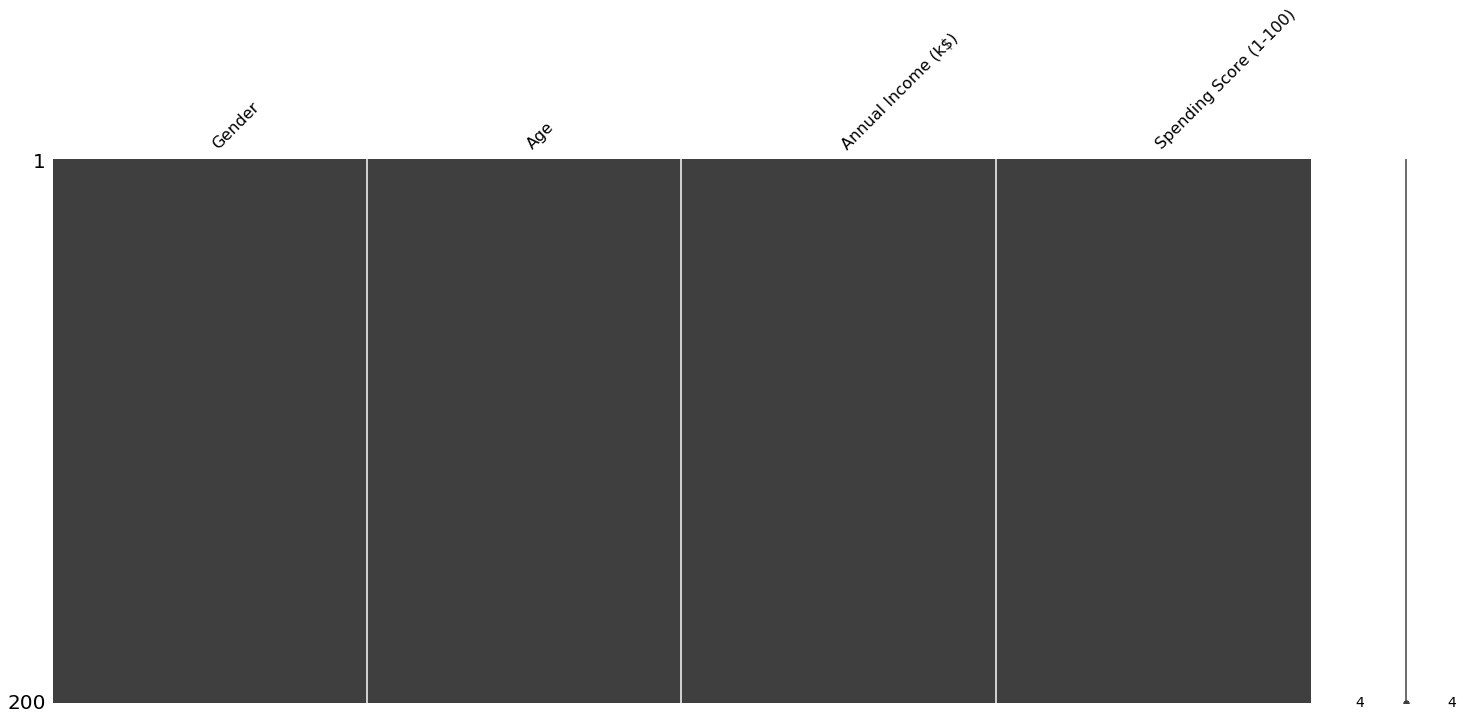

In [9]:
import missingno as mn
mn.matrix(df)

In [10]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

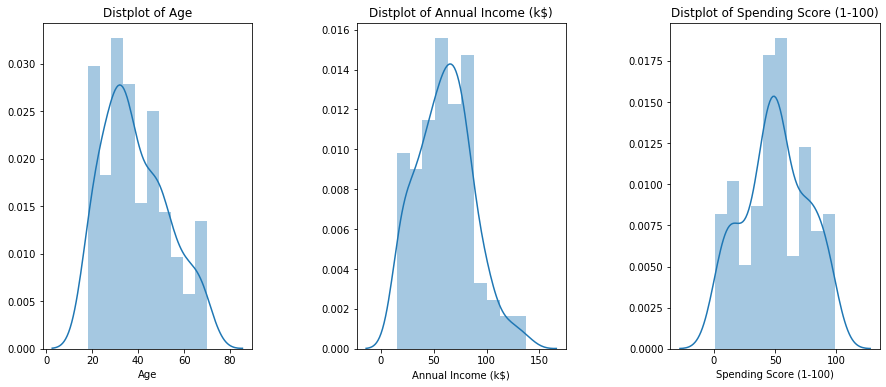

In [11]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)#n=1 i.e plot 1,1=row,3 columns
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=10)
    plt.title("Distplot of {}".format(x))
plt.show()

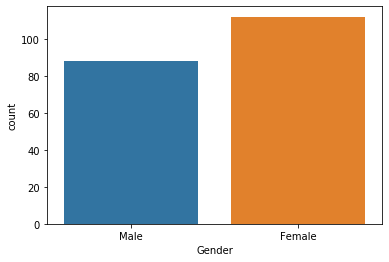

In [12]:
sns.countplot(data=df,x="Gender")

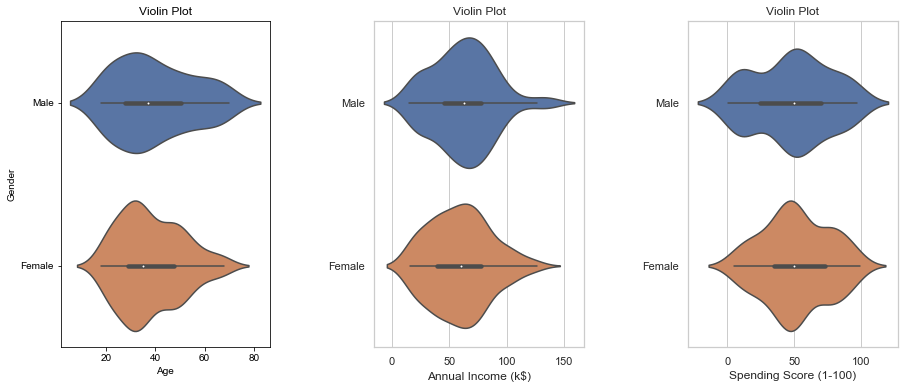

In [13]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n+=1
    plt.subplot(1,3,n)#n=1 i.e plot 1,1=row,3 columns
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x,y="Gender",data=df)
    plt.ylabel("Gender" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

Text(0, 0.5, 'Spending Score')

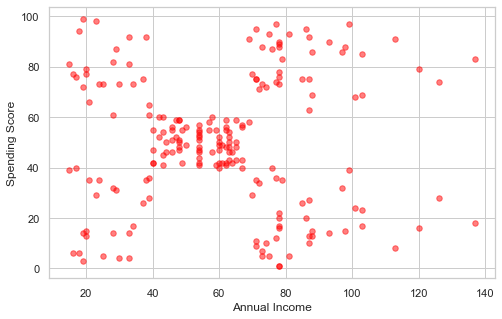

In [14]:
plt.figure(figsize=(8,5))
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=df, s=30, color="red", alpha = 0.5)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

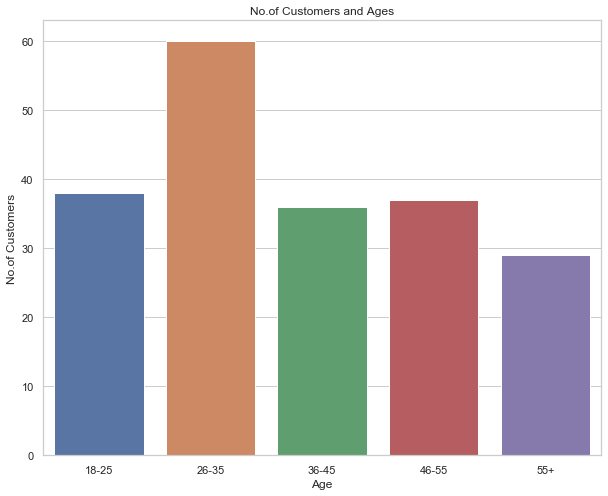

In [15]:
age_a=df.Age[(df.Age>=18) & (df.Age<=25)]
age_b=df.Age[(df.Age>=26 )& (df.Age<=35)]
age_c=df.Age[(df.Age>=36) & (df.Age<=45)]
age_d=df.Age[(df.Age>=46)& (df.Age<=55)]
age_e=df.Age[(df.Age>=56)]
age_x=["18-25","26-35","36-45","46-55","55+"]
age_y=[len(age_a.values),len(age_b.values),len(age_c.values),len(age_d.values),len(age_e.values)]
plt.figure(figsize=(10,8))
sns.barplot(x=age_x,y=age_y)
plt.title("No.of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("No.of Customers")
plt.show()

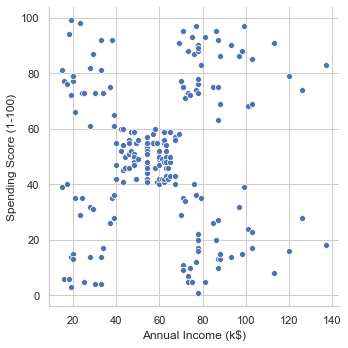

In [16]:
sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

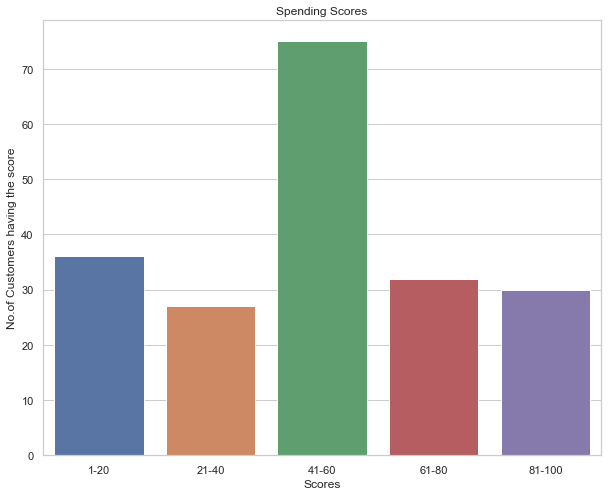

In [17]:
ssa=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)& (df["Spending Score (1-100)"]<=20)]
ssb=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)& (df["Spending Score (1-100)"]<=40)]
ssc=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)& (df["Spending Score (1-100)"]<=60)]
ssd=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)& (df["Spending Score (1-100)"]<=80)]
sse=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)& (df["Spending Score (1-100)"]<=100)]
ssx=["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ssa.values),len(ssb.values),len(ssc.values),len(ssd.values),len(sse.values)]
plt.figure(figsize=(10,8))
sns.barplot(x=ssx,y=ssy)
plt.title("Spending Scores")
plt.xlabel("Scores")
plt.ylabel("No.of Customers having the score")
plt.show()

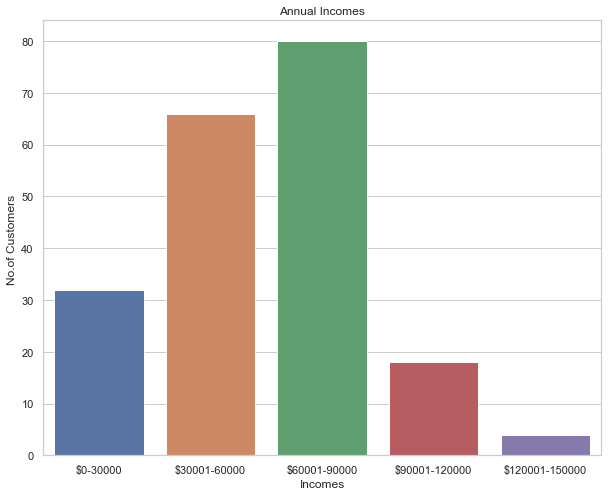

In [18]:
ai_a=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0)& (df["Annual Income (k$)"]<=30)]
ai_b=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)& (df["Annual Income (k$)"]<=60)]
ai_c=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)& (df["Annual Income (k$)"]<=90)]
ai_d=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)& (df["Annual Income (k$)"]<=120)]
ai_e=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)& (df["Annual Income (k$)"]<=150)]
ai_x=["$0-30000","$30001-60000","$60001-90000","$90001-120000","$120001-150000"]
ai_y=[len(ai_a.values),len(ai_b.values),len(ai_c.values),len(ai_d.values),len(ai_e.values)]
plt.figure(figsize=(10,8))
sns.barplot(x=ai_x,y=ai_y)
plt.title("Annual Incomes")
plt.xlabel("Incomes")
plt.ylabel("No.of Customers ")
plt.show()

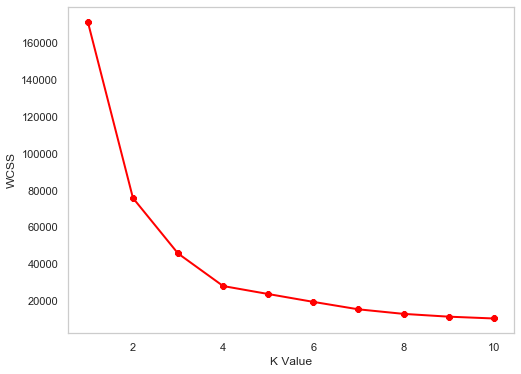

In [19]:
x1=df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 3 3 0 2 3 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0
 2 0 2 1 2 1 3 0 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 2 3 2 1 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [21]:
#cluster_centers_ gives centroid k coordinates
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


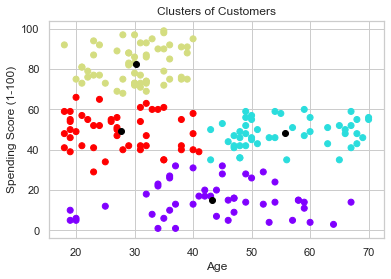

In [22]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

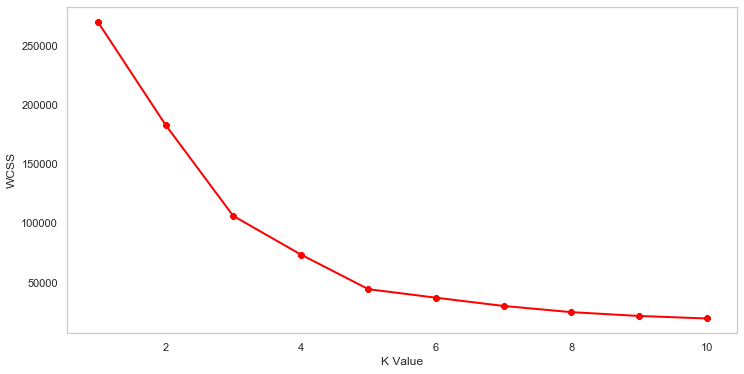

In [23]:
x2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [25]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


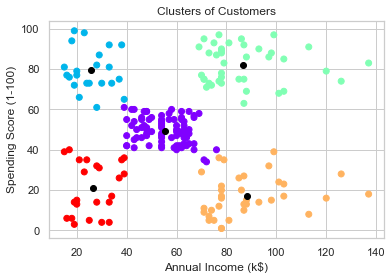

In [26]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

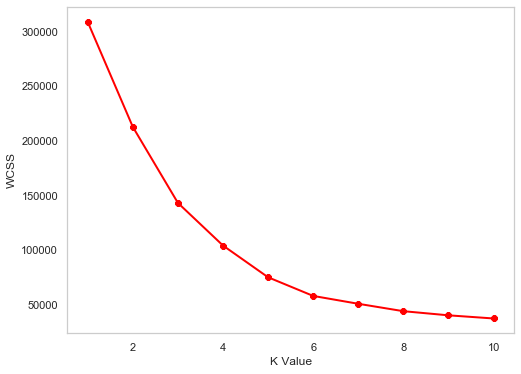

In [27]:
x3=df.iloc[:,1:].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [28]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)


[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 2 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


In [29]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]]


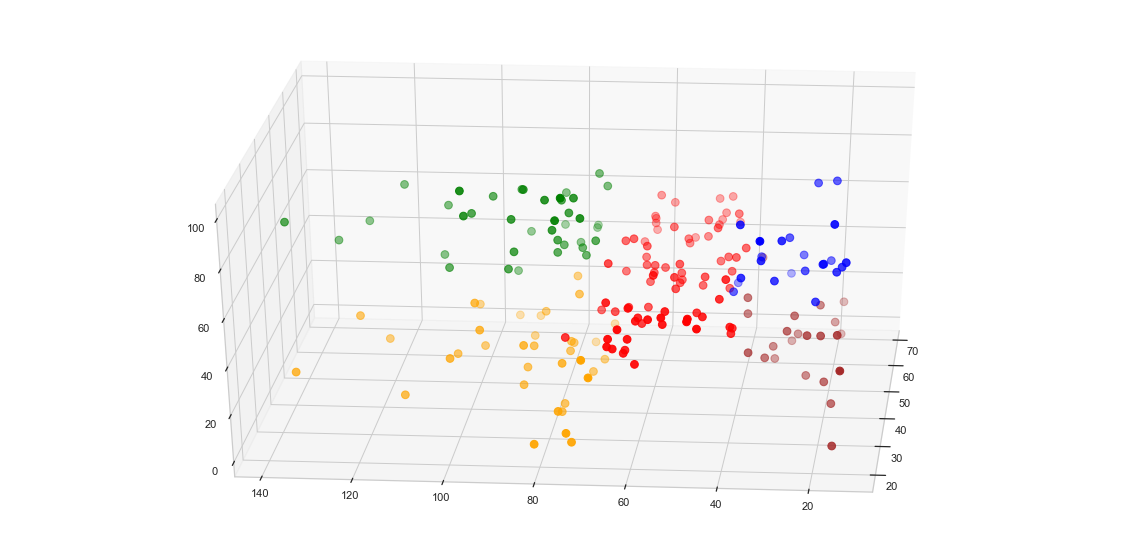

In [30]:
clusters=kmeans.fit_predict(x3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c="blue",s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c="red",s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c="green",s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c="orange",s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c="brown",s=60)
ax.view_init(30,185)